In [ ]:
from daily_dialog import DailyDialog

builder = DailyDialog()
builder.download_and_prepare()
dataset = builder.as_dataset()

from transformers import AutoTokenizer
from datasets import DatasetDict

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dialogues (flattening lists of utterances)
def tokenize_function(example):
    # Check if each dialog entry is a list of strings and join them
    if isinstance(example['dialog'], list):
        example['dialog'] = [' '.join(dialog) if isinstance(dialog, list) else dialog for dialog in example['dialog']]
    
    return tokenizer(example['dialog'], padding='max_length', truncation=True, max_length=128)

# Apply the tokenizer to the entire dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


# Format the dataset for PyTorch or TensorFlow
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask'])


In [ ]:
def print_dataset_structure(dataset):
    for split_name, split_data in dataset.items():
        print(f"\n--- {split_name.upper()} SPLIT ---")
        print(f"Number of rows: {len(split_data)}")
        print("Columns:", split_data.column_names)
        
        # Print a sample of the data (e.g., the first entry)
        print("\nSample data (first entry):")
        sample = split_data[0]
        for key, value in sample.items():
            # If the value is a long list (e.g., input_ids), print only the start for brevity
            if isinstance(value, list) and len(value) > 10:
                print(f"{key}: {value[:10]}... (truncated)")
            else:
                print(f"{key}: {value}")

# Print the structure of the tokenized_datasets
print_dataset_structure(tokenized_datasets)


In [ ]:
import train

train.run(total_epoch=50, best_loss=float('inf'))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import train 
%matplotlib inline
import analysis.sae_analyzer as SAEAnalyzer

# Run the training
# When training:
model, valid_iter, device, sae_metadata = train.main(total_epoch=40, batch_size=48, save_dir= "try")

Repo card metadata block was not found. Setting CardData to empty.


Initialized DialogLoader with bert-base-uncased tokenizer
Loading DailyDialog dataset...
Dataset loaded successfully
Tokenizing dataset...
Formatting dataset for PyTorch...
Dataset preparation complete
Training step: 0/232 (0.0%), Loss: 77148.4688
Training step: 23/232 (9.9%), Loss: 35618.4453
Training step: 46/232 (19.8%), Loss: 25677.1738
Training step: 69/232 (29.7%), Loss: 20241.4082
Training step: 92/232 (39.7%), Loss: 15791.7500
Training step: 115/232 (49.6%), Loss: 12009.0742
Training step: 138/232 (59.5%), Loss: 8840.6084
Training step: 161/232 (69.4%), Loss: 6244.5503
Training step: 184/232 (79.3%), Loss: 4187.4277
Training step: 207/232 (89.2%), Loss: 2617.7964
Training step: 230/232 (99.1%), Loss: 1481.4135
Training step: 231/232 (99.6%), Loss: 1441.3958
Epoch: 1 | Time: 0m 30s
	Train Loss: 16434.115
	Valid Loss: 8.605
	Emotion Accuracy: 0.702
Training step: 0/232 (0.0%), Loss: 1400.8596
Training step: 23/232 (9.9%), Loss: 666.4023
Training step: 46/232 (19.8%), Loss: 235.79

KeyboardInterrupt: 

In [5]:
import sys
if 'analysis.sae_analyzer' in sys.modules:
    del sys.modules['analysis.sae_analyzer']

# Then reload the module
from analysis.sae_analyzer import SAEAnalyzer

/tmp/ipykernel_3134543/3061325277.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('saved/try2/model-3693.032.pt')  # Use your actual checkpoint p

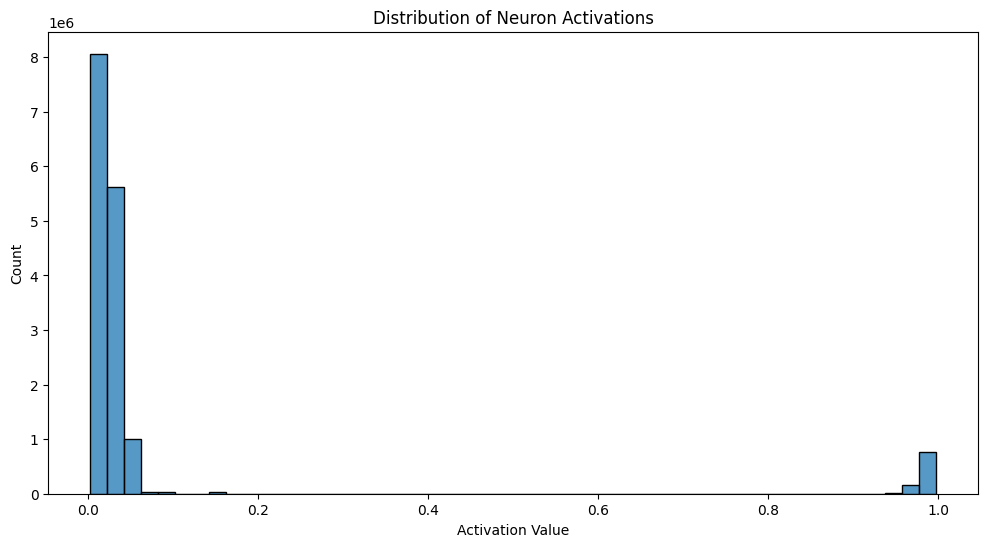

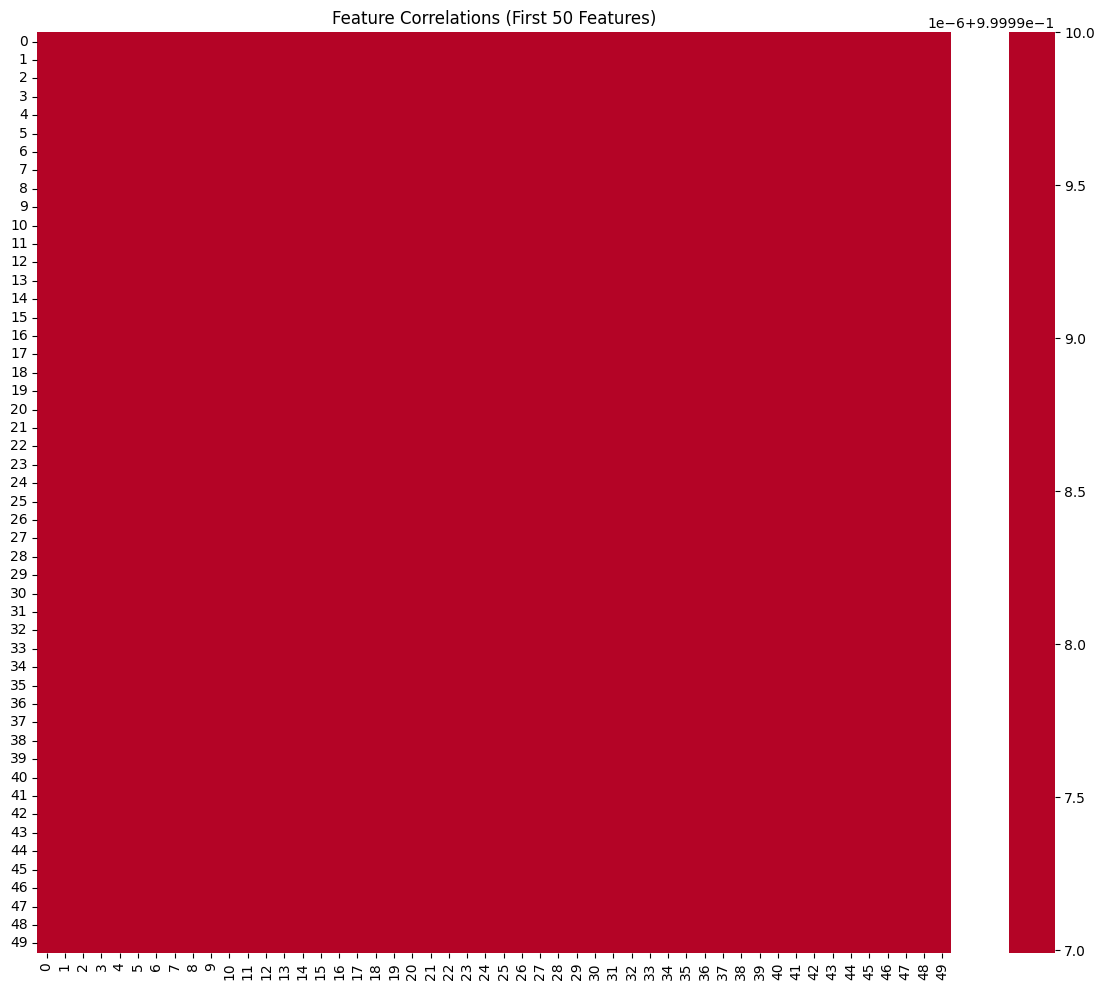

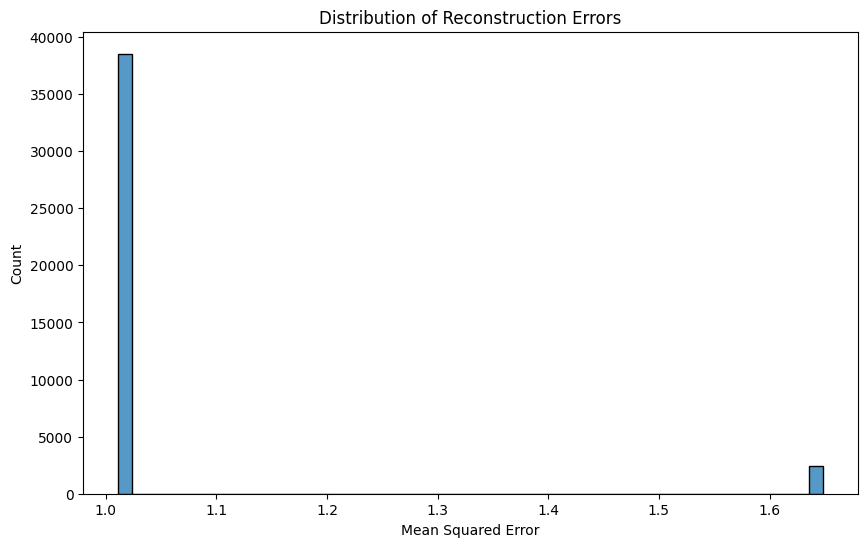

Number of dead features: 0
Average activation rate: 1.000

Feature Statistics:
Mean activation: 0.081
Std activation: 0.227
Max activation: 0.997
Min activation: 0.003


In [13]:
import torch
import numpy as np
from analysis.sae_analyzer import SAEAnalyzer
import matplotlib.pyplot as plt

# Load the checkpoint
checkpoint = torch.load('saved/try2/model-3693.032.pt')  # Use your actual checkpoint path
sae_metadata = checkpoint['sae_metadata']

# Create analyzer from metadata
analyzer = SAEAnalyzer.from_metadata(sae_metadata)

# Now you can use all the analyzer functions
analyzer.plot_activation_distribution()
plt.show()

analyzer.plot_feature_correlations()
plt.show()

analyzer.plot_reconstruction_error()
plt.show()

# Additional analysis
# Get statistics
print(f"Number of dead features: {len(analyzer.get_dead_features())}")
print(f"Average activation rate: {analyzer.get_activation_rates().mean():.3f}")

# Get more detailed statistics
stats = analyzer.get_feature_statistics()
print("\nFeature Statistics:")
print(f"Mean activation: {stats['mean_activations'].mean():.3f}")
print(f"Std activation: {stats['std_activations'].mean():.3f}")
print(f"Max activation: {stats['max_activations'].max():.3f}")
print(f"Min activation: {stats['min_activations'].min():.3f}")

In [8]:
import torch

# Load the checkpoint
checkpoint = torch.load('saved/try_new/model-1778.710.pt')  # Use your actual checkpoint path

# Print the structure of the checkpoint
for key, value in checkpoint.items():
    print(f"Key: {key}")
    if isinstance(value, dict):
        print("Value: (dict with keys)")
        for sub_key in value.keys():
            print(f"  - {sub_key}")
    elif isinstance(value, torch.Tensor):
        print(f"Value: (Tensor with shape {value.shape})")
    else:
        print(f"Value: {value}")

/tmp/ipykernel_3134543/4165006448.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('saved/try_new/model-1778.710.pt')  # Use your actual checkpoin

Key: epoch
Value: 15
Key: model_state_dict
Value: (dict with keys)
  - transformer.encoder.emb.tok_emb.weight
  - transformer.encoder.layers.0.attention.w_q.weight
  - transformer.encoder.layers.0.attention.w_q.bias
  - transformer.encoder.layers.0.attention.w_k.weight
  - transformer.encoder.layers.0.attention.w_k.bias
  - transformer.encoder.layers.0.attention.w_v.weight
  - transformer.encoder.layers.0.attention.w_v.bias
  - transformer.encoder.layers.0.attention.w_concat.weight
  - transformer.encoder.layers.0.attention.w_concat.bias
  - transformer.encoder.layers.0.norm1.gamma
  - transformer.encoder.layers.0.norm1.beta
  - transformer.encoder.layers.0.ffn.linear1.weight
  - transformer.encoder.layers.0.ffn.linear1.bias
  - transformer.encoder.layers.0.ffn.linear2.weight
  - transformer.encoder.layers.0.ffn.linear2.bias
  - transformer.encoder.layers.0.norm2.gamma
  - transformer.encoder.layers.0.norm2.beta
  - transformer.encoder.layers.1.attention.w_q.weight
  - transformer.enco

In [ ]:
analyzer.plot_feature_correlations()
plt.show()

In [ ]:
analyzer.plot_feature_correlations()
plt.show()

In [ ]:
analyzer.plot_reconstruction_error()
plt.show()